In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import io
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/covid_data.csv")
# print(df)

In [ ]:
df.isnull().sum()

Unnamed: 0               0
iso_code                 0
country                  0
date                     0
total_cases              0
new_cases                0
total_deaths             0
new_deaths               0
reproduction_rate        0
total_tests              0
new_tests                0
positive_rate            0
tests_per_case           0
total_vaccinations       0
people_vaccinated        0
new_vaccinations         0
population_density       0
median_age               0
aged_65_older            0
cardiovasc_death_rate    0
life_expectancy          0
population               0
dtype: int64

In [ ]:

df.duplicated().sum()

0

In [ ]:
df.describe()

,Unnamed: 0,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,new_vaccinations,population_density,median_age,aged_65_older,cardiovasc_death_rate,life_expectancy,population
count,63606.000000,6.360600e+04,6.360600e+04,63606.000000,63606.000000,63606.000000,6.360600e+04,6.360600e+04,63606.000000,63606.000000,6.360600e+04,6.360600e+04,6.360600e+04,63606.000000,63606.000000,63606.000000,63606.000000,63606.000000,6.360600e+04
mean,31803.500000,1.166947e+06,4.483015e+03,19454.753322,46.363220,1.044327,1.648699e+07,5.213914e+04,0.106736,105.275554,4.801747e+07,2.656732e+07,2.219969e+05,219.711088,34.310832,11.503898,214.979103,76.216549,4.722930e+07
std,18361.614948,3.563306e+06,4.785366e+04,50769.947385,417.567571,0.296172,5.719599e+07,1.592671e+05,0.117559,552.208970,1.031347e+08,5.901366e+07,4.459451e+05,480.230776,8.364928,6.464499,101.058291,6.038995,1.598966e+08
min,1.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.100000e+01,1.000000e+00,0.000100,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.980000,15.100000,2.168000,79.370000,54.330000,4.700000e+01
25%,15902.250000,2.561700e+04,0.000000e+00,416.500000,0.000000,0.870000,4.757612e+05,2.530000e+03,0.021200,6.500000,1.682174e+07,9.239386e+06,1.556242e+05,46.754000,28.200000,5.732000,128.275000,73.320000,4.030361e+06
50%,31803.500000,1.855190e+05,0.000000e+00,3445.500000,0.000000,1.040000,2.452708e+06,9.568000e+03,0.063300,15.800000,5.011884e+07,2.761466e+07,2.265810e+05,104.914000,34.231786,11.198000,197.093000,76.980000,1.049399e+07
75%,47704.750000,7.968490e+05,0.000000e+00,16024.000000,0.000000,1.190000,1.171119e+07,3.740200e+04,0.154000,47.200000,5.011884e+07,2.761466e+07,2.265810e+05,231.447000,42.000000,18.436000,280.033000,81.540000,3.845433e+07
max,63606.000000,4.329669e+07,2.738957e+06,524855.000000,28982.000000,5.870000,8.585264e+08,3.740296e+06,0.991200,18720.300000,1.962421e+09,1.014916e+09,1.862727e+07,7915.731000,48.200000,27.049000,559.812000,84.630000,1.417173e+09


In [ ]:
def convert_date_format(date_string, current_format, new_format):
    # Parse the input date string using the current format
    date_object = datetime.strptime(date_string, current_format)
    # Convert the date object to the new format
    new_date_string = date_object.strftime(new_format)
    return new_date_string

In [ ]:
df

,Unnamed: 0,iso_code,country,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,...,tests_per_case,total_vaccinations,people_vaccinated,new_vaccinations,population_density,median_age,aged_65_older,cardiovasc_death_rate,life_expectancy,population
0,1,ALB,Albania,15/03/2020,33.0,33,1.0,1,1.045226,532.0,...,11.3,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
1,2,ALB,Albania,16/03/2020,33.0,0,1.0,0,1.045226,563.0,...,9.9,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
2,3,ALB,Albania,17/03/2020,33.0,0,1.0,0,1.045226,605.0,...,10.9,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
3,4,ALB,Albania,18/03/2020,33.0,0,1.0,0,1.045226,665.0,...,10.9,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
4,5,ALB,Albania,19/03/2020,33.0,0,1.0,0,1.045226,697.0,...,9.7,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63601,63602,UGA,Uganda,28/10/2021,125758.0,0,3200.0,0,0.900000,1801297.0,...,56.9,3269568.00,2854082.00,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63602,63603,UGA,Uganda,29/10/2021,125758.0,0,3200.0,0,0.900000,1806387.0,...,62.3,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63603,63604,UGA,Uganda,30/10/2021,125758.0,0,3200.0,0,0.900000,1811360.0,...,68.6,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63604,63605,UGA,Uganda,31/10/2021,126236.0,478,3215.0,15,0.910000,1816587.0,...,67.9,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588


In [ ]:
#df['date'] = df['date'].apply(lambda x: convert_date_format(x, '%d/%m/%Y', '%d/%m/%Y'))


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [ ]:
before_2021 = df[df['date'].dt.year < 2021]

In [ ]:
in_2021 = df[df['date'].dt.year == 2021]

In [ ]:
in_2021

,Unnamed: 0,iso_code,country,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,...,tests_per_case,total_vaccinations,people_vaccinated,new_vaccinations,population_density,median_age,aged_65_older,cardiovasc_death_rate,life_expectancy,population
290,291,ALB,Albania,2021-01-01,55380.0,0,1134.0,0,0.96,249384.0,...,5.2,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
291,292,ALB,Albania,2021-01-02,55380.0,0,1134.0,0,0.98,250409.0,...,4.4,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
292,293,ALB,Albania,2021-01-03,58723.0,3343,1186.0,52,1.00,252718.0,...,4.5,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
293,294,ALB,Albania,2021-01-04,58723.0,0,1186.0,0,1.01,253999.0,...,4.7,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
294,295,ALB,Albania,2021-01-05,58723.0,0,1186.0,0,1.03,257423.0,...,4.8,50118835.23,27614662.08,226581.0418,104.871,38.0,13.188,304.195,78.57,2842318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63601,63602,UGA,Uganda,2021-10-28,125758.0,0,3200.0,0,0.90,1801297.0,...,56.9,3269568.00,2854082.00,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63602,63603,UGA,Uganda,2021-10-29,125758.0,0,3200.0,0,0.90,1806387.0,...,62.3,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63603,63604,UGA,Uganda,2021-10-30,125758.0,0,3200.0,0,0.90,1811360.0,...,68.6,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588
63604,63605,UGA,Uganda,2021-10-31,126236.0,478,3215.0,15,0.91,1816587.0,...,67.9,50118835.23,27614662.08,226581.0418,213.759,16.4,2.168,213.333,63.37,47249588


In [ ]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'country', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'total_tests',
       'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'new_vaccinations', 'population_density',
       'median_age', 'aged_65_older', 'cardiovasc_death_rate',
       'life_expectancy', 'population'],
      dtype='object')

In [ ]:

columns_to_pivot = ['iso_code', 'country', 'date', 'total_cases', 'new_cases',
                   'total_deaths', 'new_deaths', 'reproduction_rate', 'total_tests',
                   'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
                   'people_vaccinated', 'new_vaccinations', 'population_density',
                   'median_age', 'aged_65_older', 'cardiovasc_death_rate',
                   'life_expectancy', 'population']

# Create the pivot table
pivot_data = pd.pivot_table(df, values=columns_to_pivot, index='country', aggfunc=max)

# You can perform additional calculations here if needed, similar to what you did for Recovery Rate and Mortality Rate

# Sort the pivot table by a specific column, if needed
pivot_data = pivot_data.sort_values(by='total_cases', ascending=False)

# Display the styled pivot table with background gradient
pivot_data.style.background_gradient(cmap='CMRmap')


,Unnamed: 0,aged_65_older,cardiovasc_death_rate,date,iso_code,life_expectancy,median_age,new_cases,new_deaths,new_tests,new_vaccinations,people_vaccinated,population,population_density,positive_rate,reproduction_rate,tests_per_case,total_cases,total_deaths,total_tests,total_vaccinations
country,,,,,,,,,,,,,,,,,,,,,
India,24739,5.989000,282.280000,2022-06-21 00:00:00,IND,69.660000,28.200000,2738957,28982,3740296,18627269.000000,1014916146.000000,1417173120,450.419000,0.226800,2.670000,474.000000,43296692.000000,524855.000000,858526354.000000,1962421213.000000
France,20272,19.718000,86.060000,2022-06-18 00:00:00,FRA,82.660000,42.000000,2417043,5602,2222575,970640.000000,54517606.000000,67813000,122.578000,0.309000,1.710000,142.900000,28841715.000000,149439.000000,278234000.000000,145483932.000000
South Korea,56744,13.914000,85.998000,2022-06-15 00:00:00,KOR,83.030000,43.400000,2716348,2429,1154325,1382042.000000,44713265.000000,51815808,527.967000,0.669100,5.870000,1867.100000,18229278.000000,25709.174560,100269452.000000,125853900.000000
Italy,28350,23.021000,113.151000,2022-06-22 00:00:00,ITA,83.510000,47.900000,1268153,5339,1481349,724887.000000,50878402.000000,59037472,205.859000,0.268400,2.860000,272.200000,17844905.000000,167703.000000,224876148.000000,138245223.000000
Russia,50139,14.178000,431.297000,2022-03-02 00:00:00,RUS,72.580000,39.600000,920697,5427,1118115,1945651.000000,76940496.000000,144713312,8.823000,0.294900,2.560000,1796.600000,16291116.000000,350927.000000,277066090.000000,155378595.000000
Turkey,63106,8.153000,171.285000,2022-05-31 00:00:00,TUR,77.690000,31.600000,712091,2493,468152,1796891.000000,57843685.000000,85341248,104.914000,0.233400,2.330000,130.400000,15070000.000000,98986.000000,163164533.000000,147734958.000000
Spain,57648,19.436000,99.403000,2022-06-17 00:00:00,ESP,83.560000,45.500000,956506,5841,505369,765399.000000,41249657.000000,47558632,93.105000,0.434000,2.150000,66.700000,12600050.000000,108915.000000,93162168.000000,94987684.000000
Argentina,1569,11.198000,191.032000,2022-06-04 00:00:00,ARG,76.670000,31.900000,770687,4516,270716,572427.000000,41188893.000000,45510324,16.177000,0.662000,2.380000,55.600000,9230573.000000,128889.000000,36663990.000000,104164884.000000
Japan,29662,27.049000,79.370000,2022-06-22 00:00:00,JPN,84.630000,48.200000,630951,1665,1329376,1757272.000000,103759541.000000,123951696,347.778000,0.491300,4.080000,510.000000,9149733.000000,31045.000000,53504941.000000,284099597.000000


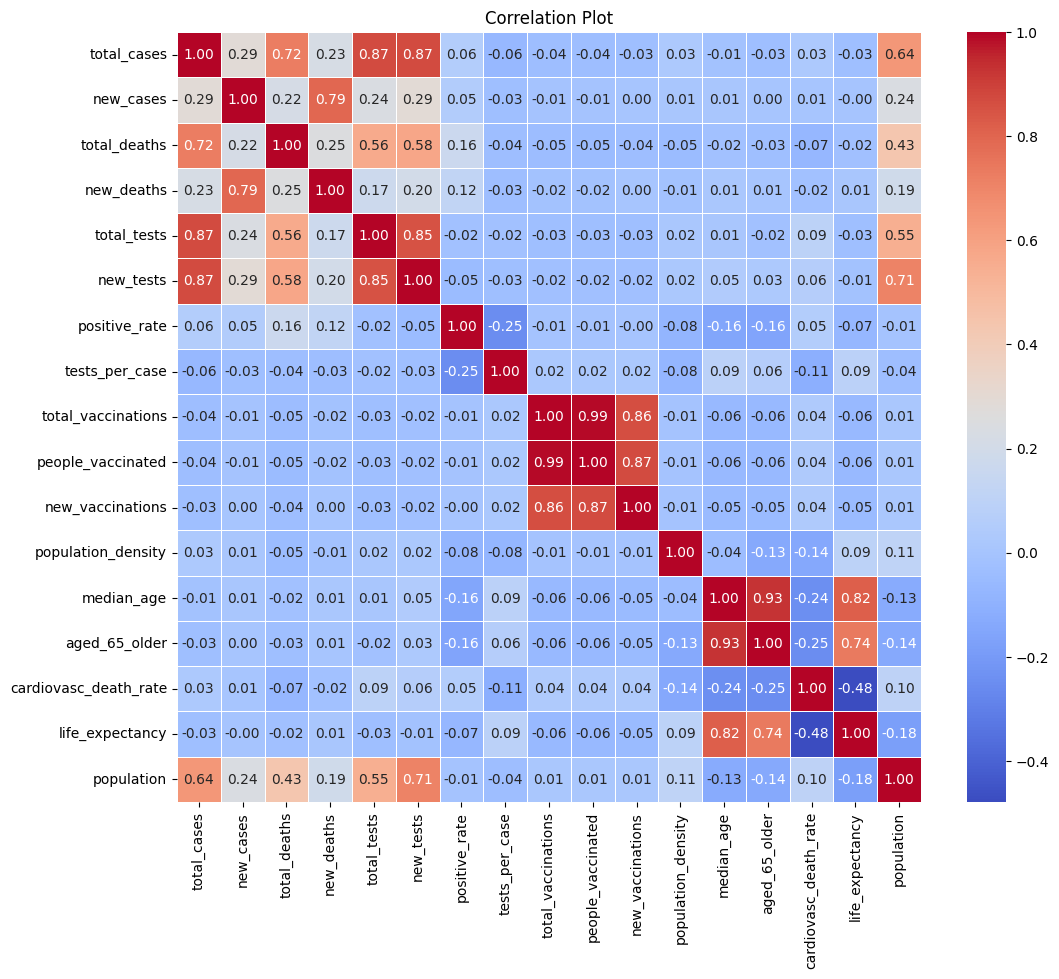

In [ ]:
columns_to_correlate = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                        'total_tests', 'new_tests', 'positive_rate', 'tests_per_case',
                        'total_vaccinations', 'people_vaccinated', 'new_vaccinations',
                        'population_density', 'median_age', 'aged_65_older',
                        'cardiovasc_death_rate', 'life_expectancy', 'population']

# Calculate the correlation matrix
correlation_matrix =before_2021[columns_to_correlate].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

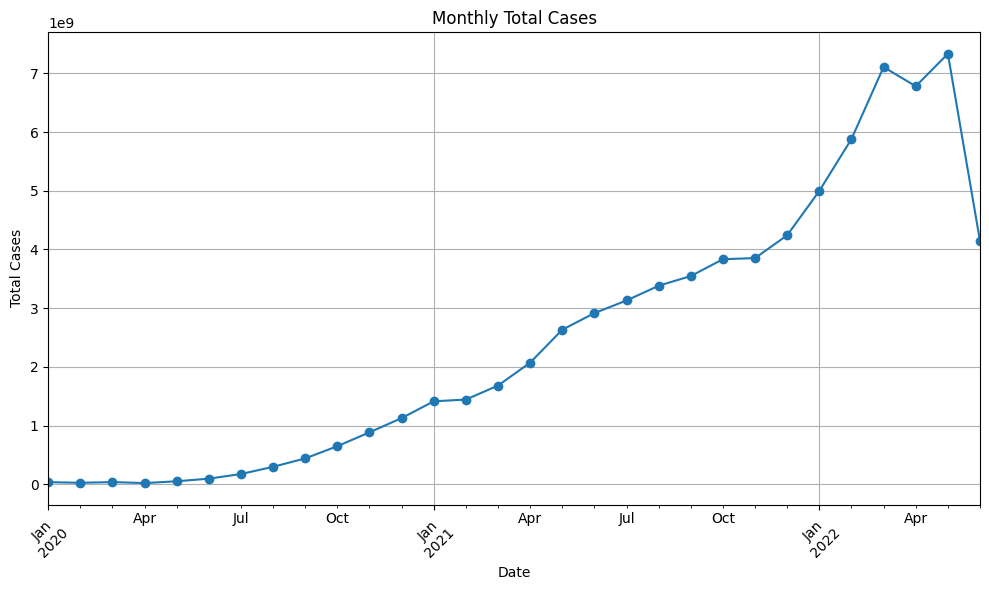

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
df.set_index('date', inplace=True)

# Resample the data on a monthly basis and sum the total cases
monthly_data = df['total_cases'].resample('M').sum()

# Plot line plot
plt.figure(figsize=(10, 6))
monthly_data.plot(marker='o', linestyle='-')
plt.title('Monthly Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63606 entries, 2020-03-15 to 2021-11-01
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             63606 non-null  int64  
 1   iso_code               63606 non-null  object 
 2   country                63606 non-null  object 
 3   total_cases            63606 non-null  float64
 4   new_cases              63606 non-null  int64  
 5   total_deaths           63606 non-null  float64
 6   new_deaths             63606 non-null  int64  
 7   reproduction_rate      63606 non-null  float64
 8   total_tests            63606 non-null  float64
 9   new_tests              63606 non-null  int64  
 10  positive_rate          63606 non-null  float64
 11  tests_per_case         63606 non-null  float64
 12  total_vaccinations     63606 non-null  float64
 13  people_vaccinated      63606 non-null  float64
 14  new_vaccinations       63606 non-null

In [ ]:
X_train = before_2021.drop(['new_cases','iso_code', 'country', 'date'], axis=1)
y_train = before_2021['total_tests']

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
X_test = in_2021.drop(['new_cases','iso_code', 'country', 'date'], axis=1)

In [ ]:
y_2021_pred = regressor.predict(X_test)

In [ ]:
r_squared = r2_score(in_2021["total_tests"], y_2021_pred)
print(f'R-squared Error: {r_squared}')


R-squared Error: 0.6024229632035862


In [ ]:
regressor1 = RandomForestRegressor()
regressor1.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_2021_pred = regressor1.predict(X_test)

In [ ]:
r_squared = r2_score(in_2021["total_tests"], y_2021_pred)
print(f'R-squared Error: {r_squared}')

R-squared Error: 0.6069042623899079


In [ ]:
x_train = df[['total_deaths', 'new_deaths', 'reproduction_rate',
                'total_tests', 'new_tests', 'positive_rate',
                'tests_per_case', 'total_vaccinations', 'people_vaccinated',
                'new_vaccinations', 'population_density', 'median_age',
                'aged_65_older', 'cardiovasc_death_rate', 'life_expectancy',
                'population']]
y_train = df['total_cases']


In [ ]:

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)


DecisionTreeRegressor()

In [ ]:
# Save the trained model to a pickle file
joblib.dump(regressor, 'decision_tree_regressor_model.pkl')

# Load the trained model from the pickle file
loaded_regressor = joblib.load('decision_tree_regressor_model.pkl')

In [ ]:
user_input = []
for column in x_train.columns:
    value = float(input(f"Enter {column}: "))
    user_input.append(value)
predicted_total_cases = loaded_regressor.predict([user_input])
print("Predicted total cases in 2022 : ", predicted_total_cases[0])

Enter total_deaths: 54654
Enter new_deaths: 54546
Enter reproduction_rate: 6547
Enter total_tests: 6547
Enter new_tests: 584564
Enter positive_rate: 54
Enter tests_per_case: 25
Enter total_vaccinations: 85
Enter people_vaccinated: 6544
Enter new_vaccinations: 6584
Enter population_density: 854784
Enter median_age: 54
Enter aged_65_older: 6584
Enter cardiovasc_death_rate: 85478
Enter life_expectancy: 98
Enter population: 9874587
Predicted total cases in 2022 :  57.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
